## Analysing the differences in payoff between percentage of strategic voting and step size

In [24]:
import pandas as pd
import numpy
df = pd.read_csv("NGA-strategic-table.csv")
# Parse Utility Vectors

# Remove all tick zero data, and all data where population is not 1000
# .4
# df = df[df["Tick"] != 0]
df = df[df["Population"] == 1000]

# Parse Utility and Social Policy Vectors
df["Total Utility"] = df["Total Utility"].apply(lambda array: numpy.fromstring(array[1:-1], sep = ' ', dtype = float))  
df["Social Policy Vector"] = df["Social Policy Vector"].apply(lambda array: numpy.fromstring(array[1:-1], sep = ' ', dtype = float))  


### Calculating the percentages of positive payoffs
Two different percentages for each combination of Step size, Population, and proportion of strategic voters will be calculated.  The first one will calculate how many times at least one direction of the utility vector was positive, and the second one will calculate how many times both directions of the utility vector were positive.

In [7]:
# Find every combination of Population, Step Size and Proportion of Strategic voters
Percentages = df[["Population", "Step Size", "Proportion of Strategic Voters"]].drop_duplicates().sort_values("Population")
Percentages = pd.concat([Percentages, pd.DataFrame(columns = ["% 1 positive payoff", "% 2 positive payoff"])], sort = True)

# Find the percentages of positive payoffs for each combination
groups = df.groupby(["Population","Step Size","Proportion of Strategic Voters"])

# Find lambda functions for finding the first and second values of the utility vector
firstitem = lambda d : d.apply(lambda x: int(x[0]))
seconditem = lambda d : d.apply(lambda x: int(x[1]))

for params, group in groups:
    # Calculate the percentages of runs that have at least one of the directions of the utility be positive, and the percentage of runs that have both directions be positve
    NumberOfRuns = group["Total Utility"].size
    NumberOfPositivePayoffs1 = pd.to_numeric((firstitem(group["Total Utility"]) > 0) | (seconditem(group["Total Utility"]) > 1)).sum()
    NumberOfPositivePayoffs2 = pd.to_numeric((firstitem(group["Total Utility"]) > 0) & (seconditem(group["Total Utility"]) > 1)).sum()
    PercentagePositive1 = NumberOfPositivePayoffs1 / NumberOfRuns * 100
    PercentagePositive2 = NumberOfPositivePayoffs2 / NumberOfRuns * 100
    
    # Find the index in percentages to send, and input the Percentages.
    EditingIndex = Percentages[(Percentages["Population"] == params[0]) &
                (Percentages["Step Size"] == params[1]) &
                (Percentages["Proportion of Strategic Voters"] == params[2])].index[0]
    Percentages.loc[EditingIndex, "% 1 positive payoff"] = PercentagePositive1
    Percentages.loc[EditingIndex, "% 2 positive payoff"] = PercentagePositive2
Percentages

,% 1 positive payoff,% 2 positive payoff,Population,Proportion of Strategic Voters,Step Size
879964,100,99.2,1000.0,0.05,0.05
15311958,100,99.59,1000.0,0.65,0.70
15300976,100,99.87,1000.0,0.60,0.70
15289972,100,99.75,1000.0,0.55,0.70
15278951,100,99.76,1000.0,0.50,0.70
15267974,100,99.74,1000.0,0.45,0.70
15256970,100,99.66,1000.0,0.40,0.70
15245976,100,99.55,1000.0,0.35,0.70
15234964,100,99.77,1000.0,0.30,0.70
15223961,100,99.56,1000.0,0.25,0.70


# Analyzing the data in line graphs
Notice how at a specific step sizes for high proportions of strategic voters, the percentage of positive payoffs drop off  

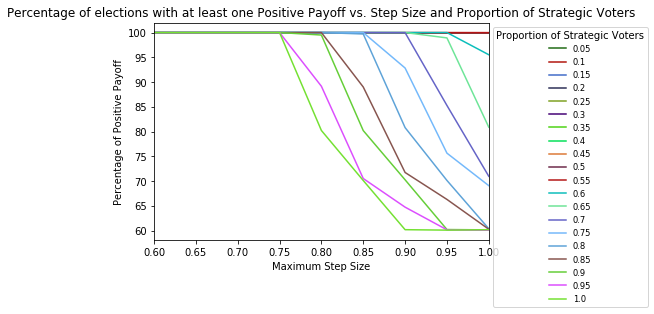

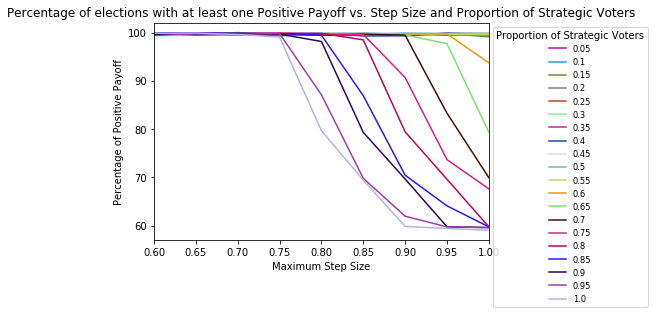

'\nCommented out code is for created contour plots\n\nStepSizes.append(StepSizes[-1] + .05)\nProportionOfStrategicVoters.append(ProportionOfStrategicVoters[-1] + .05)\nplt.pcolormesh(StepSizes, ProportionOfStrategicVoters, ArrayOfPercents1)\nplt.colorbar()\nplt.title("Percentage of elections with at least one Positive Payoff vs. Step Size and Proportion of Strategic Voters")\nplt.xlabel("Proportion of Strategic Voters")\nplt.ylabel("Maximum Step Size")\nplt.show()\n\nplt.pcolormesh(StepSizes, ProportionOfStrategicVoters, ArrayOfPercents2)\nplt.colorbar()\nplt.title("Percentage of elections with maximum payoff vs. Step Size and Proportion of Strategic Voters")\nplt.xlabel("Proportion of Strategic Voters")\nplt.ylabel("Maximum Step Size")\nplt.show()\n'

In [8]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from random import random

# Get lists of Step Sizes and PSV
StepSizes = list(map(lambda x: float(x), Percentages["Step Size"].drop_duplicates().sort_values()))
ProportionOfStrategicVoters = list(map(lambda x: float(x), Percentages["Proportion of Strategic Voters"].drop_duplicates().sort_values()))

# Make 2D arrays of Percentages. Row correspond with CSV, and Column corresponds with StepSize
ArrayOfPercents1 = []
ArrayOfPercents2 = []
for ProportionIndex in range(len(ProportionOfStrategicVoters)):
    # Make new List, and add each percentage to it for a given PSV
    ArrayOfPercents1.append([])
    ArrayOfPercents2.append([])
    for Size in StepSizes:
        ArrayOfPercents1[int(ProportionIndex)].append(Percentages[(Percentages["Step Size"] == Size) & 
                                                (Percentages["Proportion of Strategic Voters"] == ProportionOfStrategicVoters[ProportionIndex])]
                                                 ["% 1 positive payoff"].get_values()[0])
        ArrayOfPercents2[int(ProportionIndex)].append(Percentages[(Percentages["Step Size"] == Size) & 
                                                (Percentages["Proportion of Strategic Voters"] == ProportionOfStrategicVoters[ProportionIndex])]
                                                 ["% 2 positive payoff"].get_values()[0])

# Set font size and constants
fontP = FontProperties()
fontP.set_size('small')
xlimits = [.6, 1]
TITLE = "Percentage of elections with at least one Positive Payoff vs. Step Size and Proportion of Strategic Voters"

# Create plot for at least one positive direction of utility
for ProportionIndex in range(len(ProportionOfStrategicVoters)):
    current1 = ArrayOfPercents1[ProportionIndex]
    plt.plot(StepSizes, current1, label = ProportionOfStrategicVoters[ProportionIndex], 
             color = (random(),random(), random()))
plt.title(TITLE)
plt.xlabel("Maximum Step Size")
plt.ylabel("Percentage of Positive Payoff")
plt.legend(bbox_to_anchor= (1,1), prop = fontP, title = "Proportion of Strategic Voters")
plt.xlim(xlimits)
plt.show()

# Create plot for both positive directions of utility
for ProportionIndex in range(len(ProportionOfStrategicVoters)):
    current2 = ArrayOfPercents2[ProportionIndex]
    plt.plot(StepSizes, current2, label = ProportionOfStrategicVoters[ProportionIndex], 
             color = (random(),random(), random()))
plt.title(TITLE)
plt.xlabel("Maximum Step Size")
plt.ylabel("Percentage of Positive Payoff")
plt.legend(bbox_to_anchor= (1,1), prop = fontP, title = "Proportion of Strategic Voters")
plt.xlim(xlimits)
plt.show()

"""
Commented out code is for created contour plots

StepSizes.append(StepSizes[-1] + .05)
ProportionOfStrategicVoters.append(ProportionOfStrategicVoters[-1] + .05)
plt.pcolormesh(StepSizes, ProportionOfStrategicVoters, ArrayOfPercents1)
plt.colorbar()
plt.title("Percentage of elections with at least one Positive Payoff vs. Step Size and Proportion of Strategic Voters")
plt.xlabel("Proportion of Strategic Voters")
plt.ylabel("Maximum Step Size")
plt.show()

plt.pcolormesh(StepSizes, ProportionOfStrategicVoters, ArrayOfPercents2)
plt.colorbar()
plt.title("Percentage of elections with maximum payoff vs. Step Size and Proportion of Strategic Voters")
plt.xlabel("Proportion of Strategic Voters")
plt.ylabel("Maximum Step Size")
plt.show()
"""

## Now we will find the plot of a social policy vector as a function of ticks.

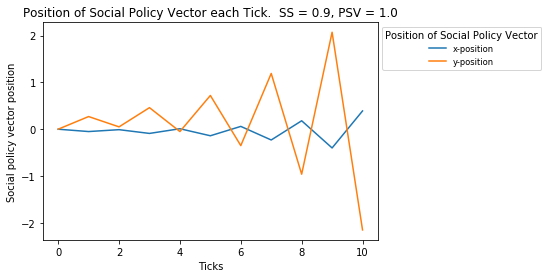

19795558    0.00
19795567   -0.05
19795576   -0.01
19795586   -0.09
19795595    0.01
19795602   -0.14
19795612    0.06
19795625   -0.23
19795636    0.18
19795649   -0.40
19795660    0.39
Name: Social Policy Vector, dtype: float64

In [43]:

import matplotlib.pyplot as plt

firstitem = lambda d : d.apply(lambda x: float(x[0]))
seconditem = lambda d : d.apply(lambda x: float(x[1]))
# Prompt StepSize and PSV for finding a graph
StepSize = float(input("Enter Step Size"))
PSV = float(input("Enter Proportion of Strategic Voters"))
Currentdf = df[(df["Step Size"] == StepSize) & (df["Proportion of Strategic Voters"] == PSV)]

# Finding a random run. 

CurrentRun = Currentdf.sample(n=1)
CurrentRun = Currentdf[Currentdf["Run number"] == CurrentRun.iat[0, 0]].sort_values("Tick")

# Plot social policy vector vs. ticks
plt.plot(CurrentRun["Tick"], firstitem(CurrentRun["Social Policy Vector"]), label = "x-position")
plt.plot(CurrentRun["Tick"], seconditem(CurrentRun["Social Policy Vector"]), label = "y-position")
plt.title("Position of Social Policy Vector each Tick.  SS = "+str(StepSize)+", PSV = "+str(PSV))
plt.xlabel("Ticks")
plt.ylabel("Social policy vector position")
plt.legend(bbox_to_anchor= (1,1), prop = fontP, title = "Position of Social Policy Vector")
plt.show()
firstitem(CurrentRun["Social Policy Vector"])